# Trabalho de Elementos de Máquinas II

---

Alunos: Abner Vieira Pereira e Caio Henrique de Souza Volotão

# Sumário
- [Introdução](#introducao)
- [Desenvolvimento](#desenvolvimento)
- [1º par de engrenagens](#engrenagens1)
- [2º par de engrenagens](#engrenagens2)
- [3º par de engrenagens](#engrenagens3)
- [Resistências à fadiga de flexão da AGMA para materiais de engrenagem](#fs)
- [Coeficiente de segurança contra flexão](#coef)
- [Coeficiente de segurança contra a falha de superfície](#coef1)
- [Referências bibliográficas](#referencia-bibliografica)

# Introdução <a id= 'introducao'></a>

In [1]:
from sympy import *
import sympy as sy
from numpy import *
import numpy as np
from IPython.display import Image
from IPython.display import Video

## 1.0 Engrenagens

As engrenagens, comumente conhecidas também como rodas dentadas, são elementos de máquinas que podem ser conectadas a eixos para transmitir rotação, torque e potência. Isso ocorre por meio dos dentes que se encontram espaçados ao redor da engrenagem, que se encaixam nos dentes de outra engrenagem, transmitindo assim o movimento.

A seguir podemos ver alguns exemplos de onde as engrenagens são aplicadas:

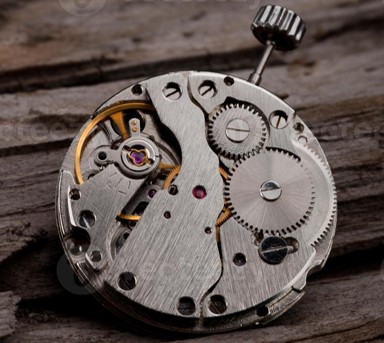

In [2]:
Image('eng2.jpg')

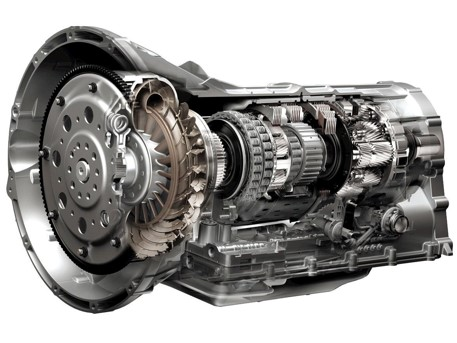

In [3]:
Image('eng3.jpg')

## 1.2 Design

As caixas de redução utilizam um conjunto de engrenagens e eixos para reduzir a velocidade de saída do motor, impacta diretamente no desempenho das máquinas e reduz significativamente os níveis de ruído e vibração.

### 1.2.3 Pares de Engrenagens

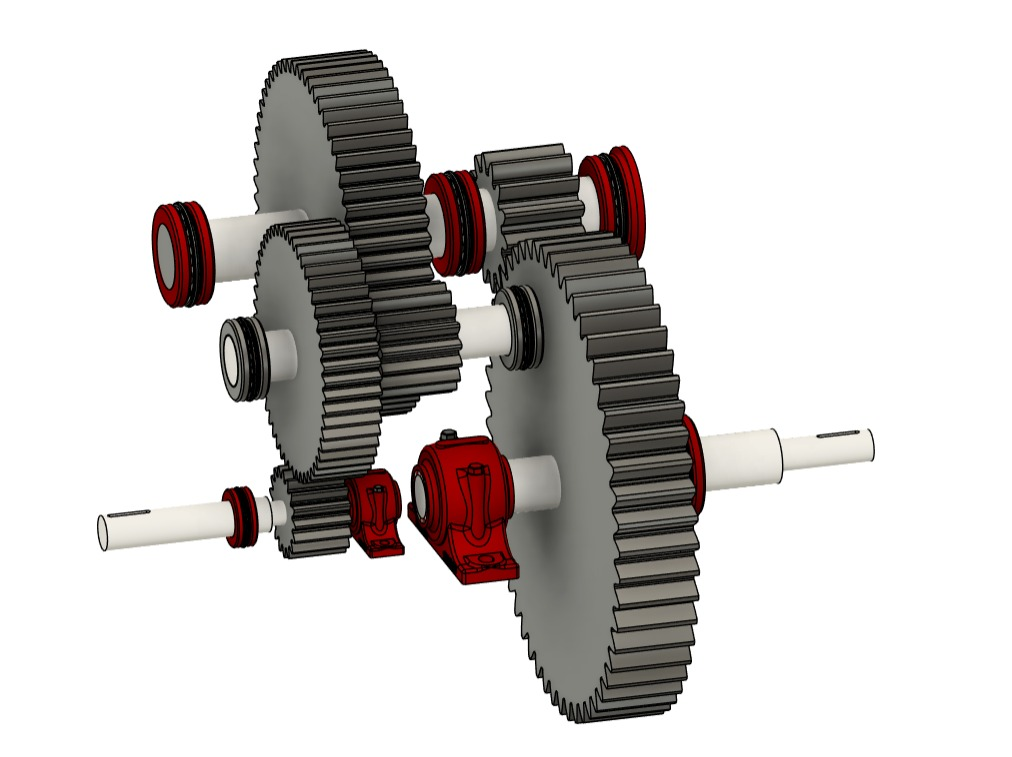

In [4]:
Image('eng4.jpg',width=600)

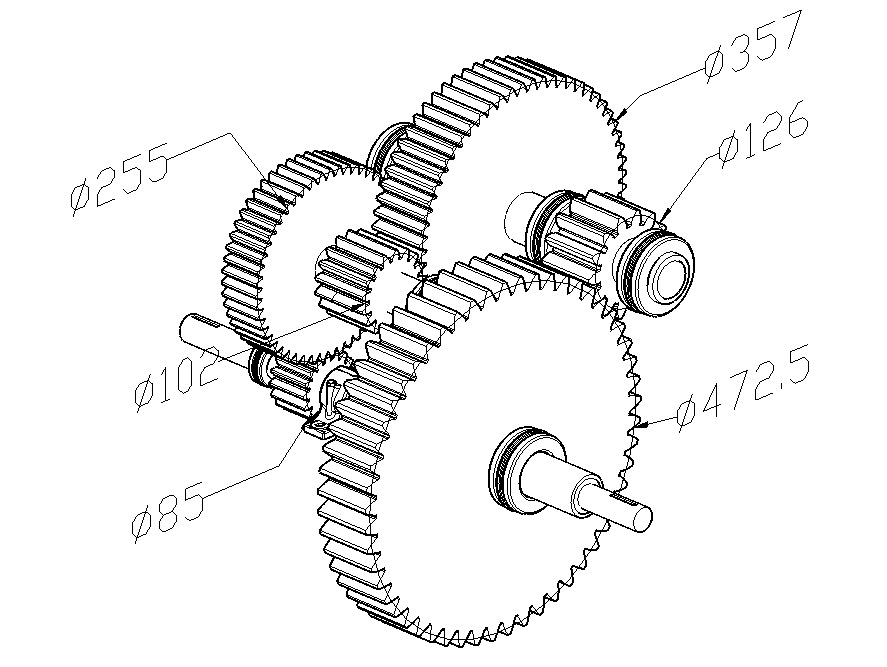

In [5]:
Image('eng_des.jpg',width=800)

### Caixa de Redução

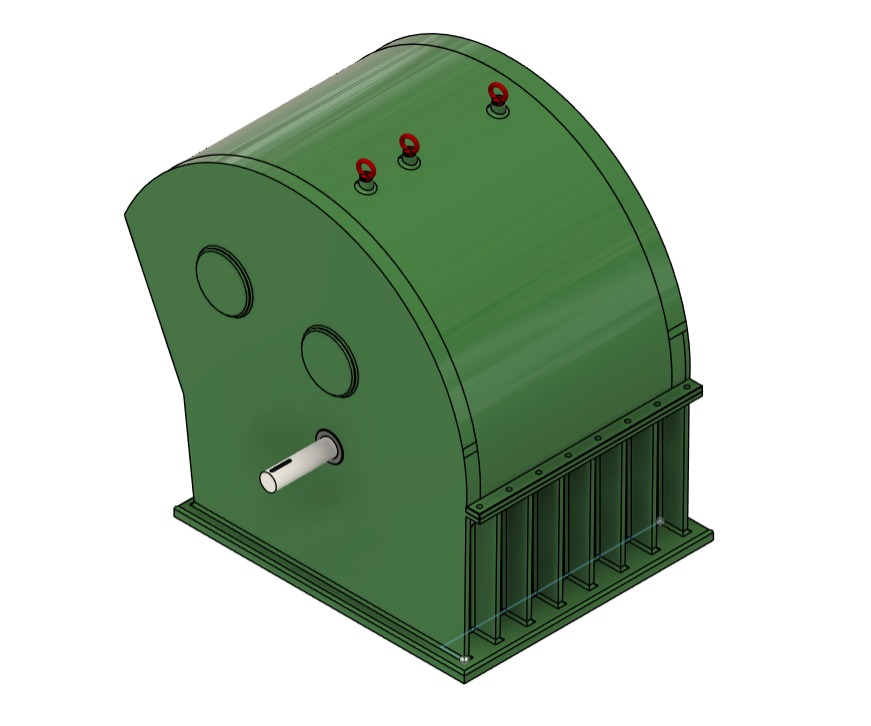

In [6]:
Image('cx2.jpg',width=500)

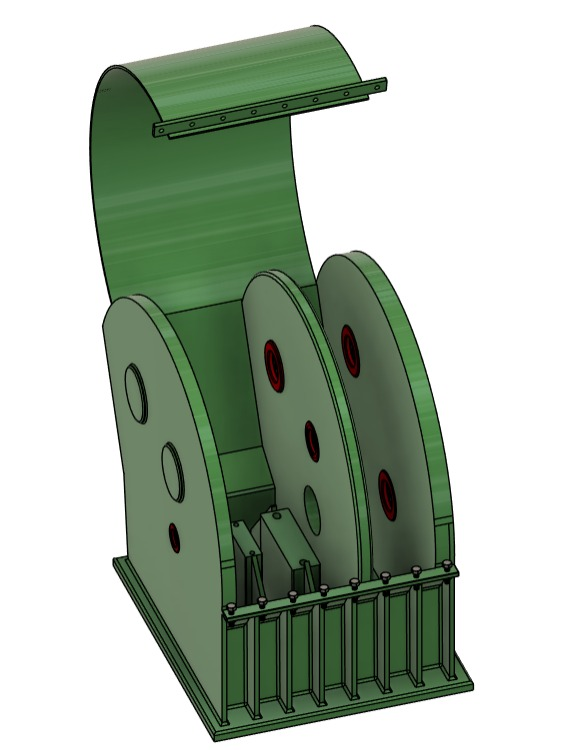

In [7]:
Image('cx3.jpg',width=400)

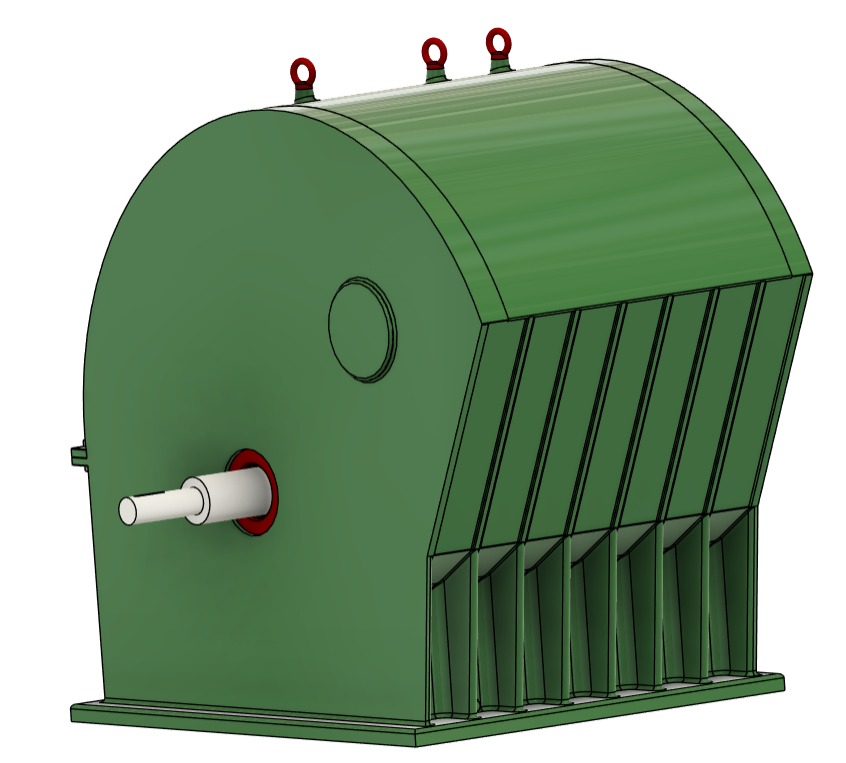

In [8]:
Image('cx5.jpg',width=500)

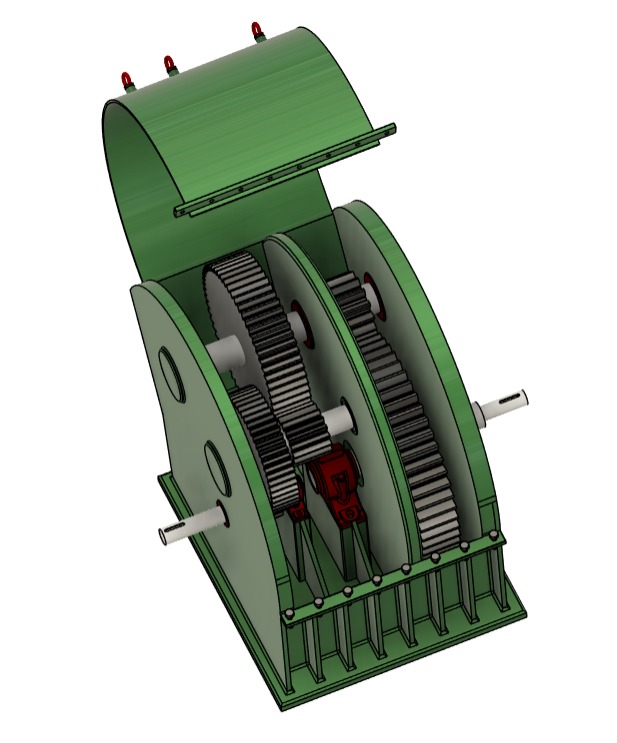

In [9]:
Image('cx1.jpg',width=500)

### Prancha

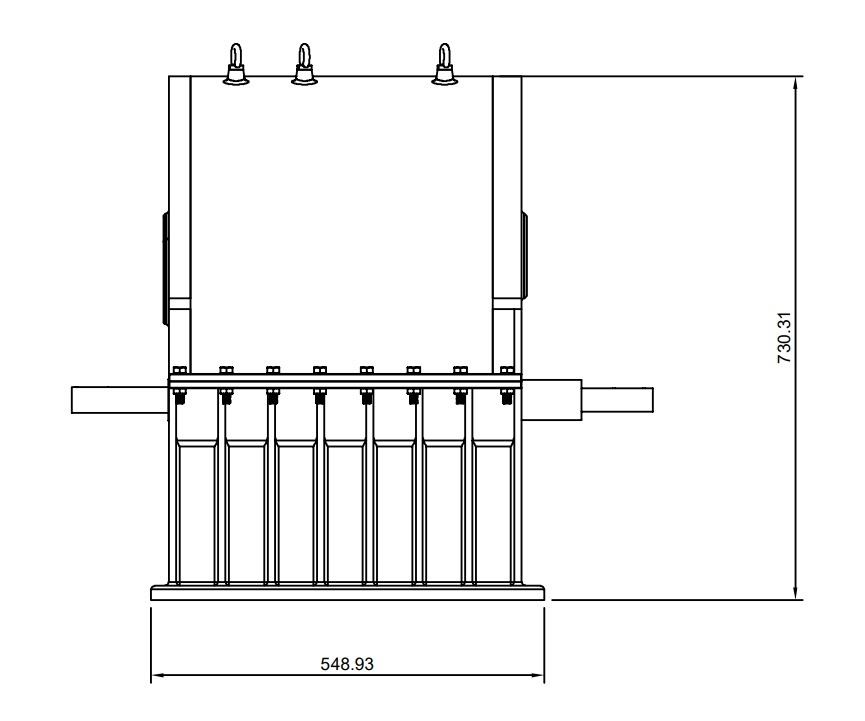

In [10]:
Image('pr1.jpg',width=600)

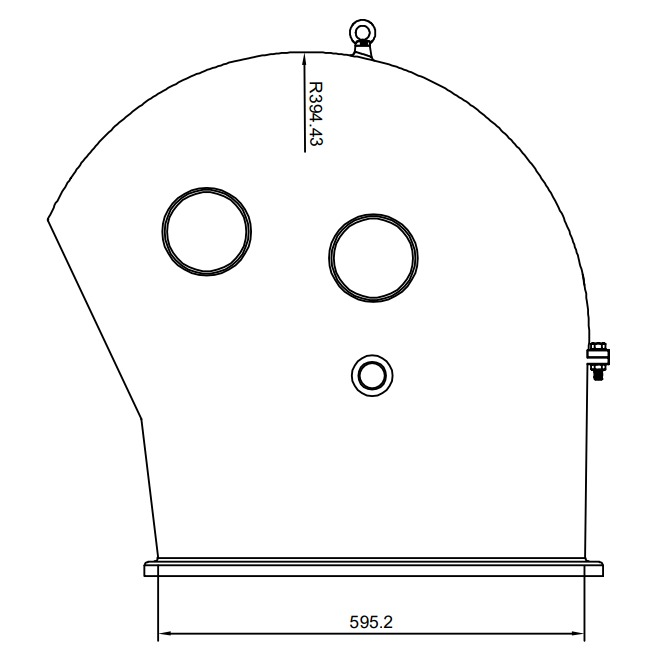

In [11]:
Image('pr2.jpg',width=600)

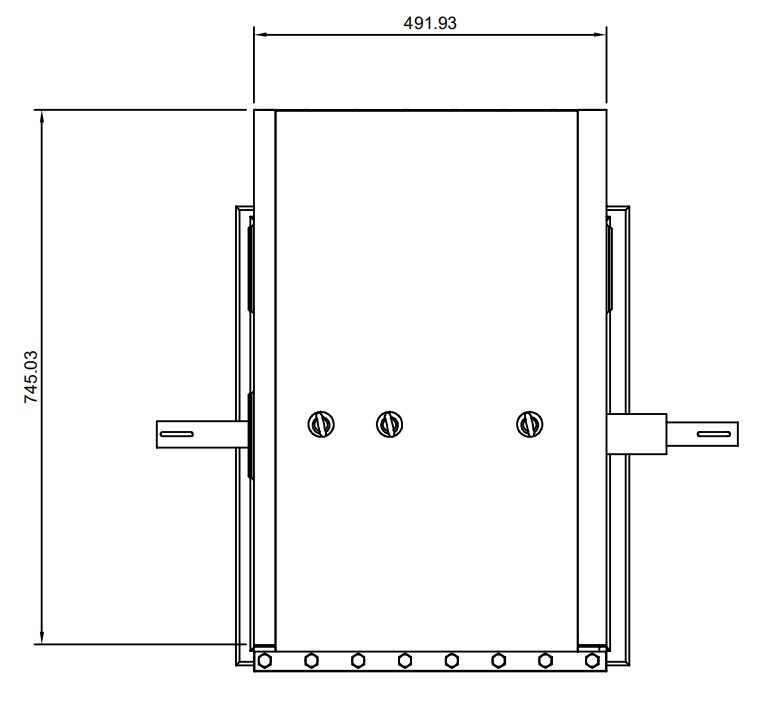

In [12]:
Image('pr3.jpg',width=600)

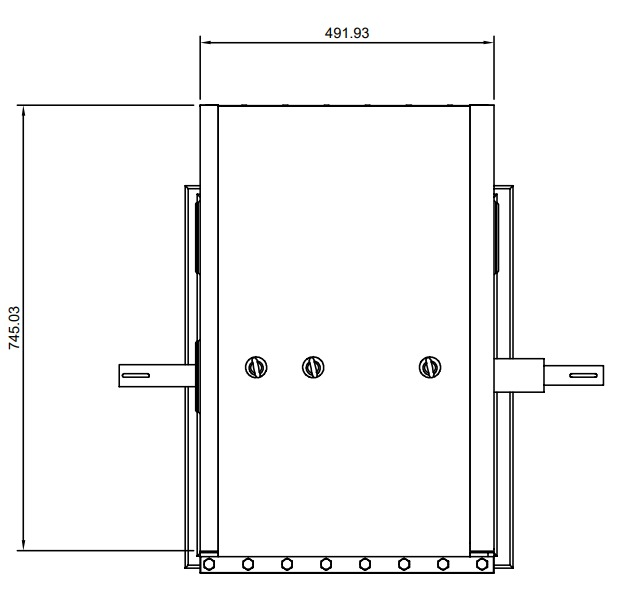

In [13]:
Image('pr4.jpg',width=600)

## Desenvolvimento <a id= 'desenvolvimento'></a>

**Enunciado :** Projete uma caixa de redução de velocidade com uma razão de transmissão de 1:40. Considere uma rotação de entrada de 1800RPM e uma potência de 10HP. O eixo de saída do redutor deverá estar alinhado ao eixo de entrada (de maior velocidade). Considere que a carga e a fonte são ambas uniformes por natureza. 


Para a concepção da dimensionamento da caixa de engrenagem, utilizou-se o conceito de classes, tendo em vista a sua notória capacidade de ser reutilizado e legível, uma vez que as relações ficam nitidamente expostas nas linhas de código.

In [14]:
m,Np,mv,w_ent,Pot,t,phi,t,ka,km,qv,ks,kb,ki,J1,J2,cf,cs,v,E = sy.symbols('m N_p m_v \omega_{ent} t Pot \phi t ka km qv ks kb ki J1 J2 cf cs v E')

In [15]:
class Par_de_Engrenagens():
    
    def __init__(self,m,Np,mv,Pot,w_ent,t,phi,ka,km,qv,ks,kb,ki,J1,J2,cf,cs,v,E):
        self.m = m   #armazena o valor do módulo
        self.Np = Np   #armazena o número de dentes do pinhão
        self.mv = mv   #armazena a relação de transmissão
        self.Pot = Pot   #armazena a potência 
        self.w_ent = w_ent   #armazena rotação em RPM
        self.t = t   #armazena a espessura da face
        self.phi = phi   #armazena o ângulo de entrada
        self.ka = ka   #armazena o valor do fator de aplicação
        self.km = km   #armazena o fator de distribuição de carga
        self.qv = qv   #armazena o valor do índice de qualidade de engrenagem
        self.ks = ks   #armazena o valor do fator de tamanho
        self.kb = kb   #armazena o valor do fator de espessura de borda
        self.ki = ki   #armazena o valor do fator de ciclo de carga
        self.J1 = J1   #armazena o fator geométrico de resistência de flexão do pinhão 
        self.J2 = J2   #armazena o fator geométrico de resistência de flexão da coroa
        self.cf = cf   #armazena o coeficiente elástico
        self.cs = cs   #armazena o fator de tamanho
        self.v = v   #armazena o valor do coeficiente de Poisson
        self.E = E   #armazena valor do módulo de elasticidade
    
    def Nc(self):
        Nc = self.Np*self.mv
        
        global Ncg
        Ncg = Nc
        
        return Nc
    
    def Dia_Prim_Pinhao(self):
        dp_pinhao = self.Np*self.m
        
        global dp_ping
        dp_ping = dp_pinhao
        
        return dp_pinhao
    
    def Dia_Prim_Coroa(self):
        dp_coroa = Ncg*self.m
        
        global dp_coroag
        dp_coroag = dp_coroa
        
        return dp_coroa
        
    def Torque_Ent(self):
        Pot = 745.7*self.Pot
        w_ent = (2*np.pi*self.w_ent)/60
        t_ent = Pot/w_ent
        
        global t_entg
        t_entg = t_ent
        
        return t_ent
    
    def Carga_Tang(self):
        w_tan = t_entg/(dp_ping/2000)
        
        global w_tang
        w_tang = w_tan
        
        return w_tan
    
    def Carga_Radial(self):
        wr = (sy.tan(self.phi)*w_tang).evalf()
        
        return wr
    
    def Carga_Total(self):
        w_tot = (w_tang/(sy.cos(self.phi))).evalf()
        
        return w_tot
    
    def Tam_Face(self):
        tf = (self.t*self.m)
        
        global tfg
        tfg = tf
        
        return tf
        
    def B(self):
        B = ((12 - self.qv)**(2/3))/4
        
        global B_g
        B_g = B
        
        return B
       
    def A(self):
        A = (50 + 56*(1 - B_g))
        
        global A_g
        A_g = A
        
        return A
    
    def Vel_Tang(self):
        w_ent = (2*np.pi*self.w_ent)/60
        
        v_t = w_ent*(dp_ping/2000)
        
        global v_tg
        v_tg = v_t
        
        return v_t
    
    def Fat_Din(self):
        kv = (A_g/(A_g + (200*v_tg)**0.5))**B_g
        
        global kvg
        kvg = kv
        
        return kv
    
    def Ten_Flex_Pin(self):
        sig_b = (w_tang*self.ka*self.km*self.ks*self.kb*self.ki)/(tfg*self.m*self.J1*kvg)
        
        return sig_b
    
    def Ten_Flex_Cor(self):
        sig_c = (w_tang/(tfg*self.m*self.J2)) * ((self.ka*self.km)/kvg) * (self.ks*self.kb*self.ki)
    
        return sig_c
        
    def Coef_Elastico(self):
        cp = (1/(np.pi*2*((1 - self.v**2)/self.E)))**0.5
        
        global cp_g
        cp_g = cp
        
        return cp
    
    def Fat_Geo_Crat(self):
        
        rho_p = ((((dp_coroag/2) + self.m)**2 - ((dp_coroag/2)*sy.cos(self.phi))**2)**0.5) - np.pi*self.m*sy.cos(self.phi)
        rho_c = (((dp_coroag/2) + (dp_ping/2))*sy.sin(self.phi)) - rho_p
        I_pc = (sy.cos(self.phi) / (((1/rho_p) + (1/rho_c))*dp_ping)).evalf()
        
        global I_pcg
        I_pcg = I_pc
        
        return I_pc
    
    def Tensao_Engrenamento(self):
        sig_ci = cp_g * (((w_tang / (tfg * I_pcg * dp_ping)) * ((self.ka * self.km)/kvg) * self.cs*self.cf))**0.5
        
        return sig_ci  

## Hipóteses:

1. O eixo do pinhão está girando a 1800 RPM, com potência de 10 HP.
2. Adotando ângulo de pressão de 25º e 17 dentes no pinhão de entrada.
3. Adotando uma redução de aproximadamente 1:$\sqrt[3]{40}$ entre os pares de engrenagem
4. Adotou-se 5 como valor do módulo do primeiro par de engrenamento, 6 para o segundo e 9 para o terceiro
5. Os dentes têm perfis padronizados AGMA de profundidade completa
6. A carga e a fonte são ambas uniformes por natureza
7. O índice de qualidade de engrenagem de 6 foi adotado
8. Coeficiente de Poisson, $\nu = 0,3$ e módulo de elasticidade de E = 200000 MPa

## 1º Par de Engrenagens <a id= 'engrenagens1'></a>

In [16]:
Eng1 = Par_de_Engrenagens(5,17,3,10,1800,8,(5*np.pi/36),1,1.6,6,1,1,1,0.38,0.478,1,1,0.3,(2*10**5))

Podemos calcular o número de dentes da coroa por meio da seguinte relação:

$$Ng = m_v N_p$$

In [17]:
print(f'O número de dentes da coroa do primeiro par de engrenagem é {Eng1.Nc()}.')

O número de dentes da coroa do primeiro par de engrenagem é 51.


A partir do número de dentes e do módulo, podemos determinar os diâmetros primitivos da coroa e do pinhão, a partir da seguinte relação:

$$D_p = N_{p,c} m$$

In [18]:
print(f'O diâmtro primitivo do pinhão é {Eng1.Dia_Prim_Pinhao()} mm.')

O diâmtro primitivo do pinhão é 85 mm.


In [19]:
print(f'O diâmetro primitivo da coroa é {Eng1.Dia_Prim_Coroa()} mm.')

O diâmetro primitivo da coroa é 255 mm.


O torque de entrada pode ser determinado por meio da seguinte relação:

$$T_p = \frac{P}{\omega_p}$$

In [20]:
print(f'O valor do torque de entrada é {Eng1.Torque_Ent():.2f} N.m .')

O valor do torque de entrada é 39.56 N.m .


A componente tangencial da carga pode ser encontrada a partir da seguinte relação:

$$W_t = \frac{T_p}{\frac{d_p}{2}}$$

In [21]:
print(f'A componente tangencial da carga vale {Eng1.Carga_Tang():.2f} N.')

A componente tangencial da carga vale 930.84 N.


Enquanto a componente radial da carga é dada por:

$$W_r = W_t \tan(\phi)$$

In [22]:
print(f'A componente radial da carga vale {Eng1.Carga_Radial():.2f} N.')

A componente radial da carga vale 434.06 N.


A carga total pode ser determinada a partir de:

$$W = \frac{W_t}{\cos(\phi)}$$

In [23]:
print(f'A carga total é {Eng1.Carga_Total():.2f} N.')

A carga total é 1027.07 N.


Estimou-se um valor para a largura de face é:

$$F = tm$$

 onde t é a espessura da face

In [24]:
print(f'A largura da face é {Eng1.Tam_Face()} mm.')

A largura da face é 40 mm.


| Largura da face (mm) | Km |
|----------|----------|
|< 50  | 1.6   | 
| 150   | 1.7   |
| 250   | 1.8   |
| >= 500   | 2.0   |

Como a largura da face encontrada foi menor que 50, o valor da distribuição de carga, km, será de 1,6.

Calculando o coeficiente B:

$$ B = \frac{{(12 - Q_v)^{\scriptscriptstyle\frac{2}{3}}}}{4} $$


In [25]:
print(f'B = {Eng1.B():.2f}')

B = 0.83


Calculando o coeficiente A:

$$A = 50 + 56(1 - B)$$

In [26]:
print(f'A = {Eng1.A():.2f}')

A = 59.77


Determinando a velocidade tangencial:

$$V_t = \omega_p \frac{d_p}{2}$$

In [27]:
print(f'A velocidade tangencial do dente é {Eng1.Vel_Tang():.2f} m/s.')

A velocidade tangencial do dente é 8.01 m/s.


O valor do fator dinâmico é dado pela seguinte relação:

$$K_v = \left( \frac{A}{A + \sqrt{200V_t}} \right)^3 $$

In [28]:
print(f'O fator dinâmico é dado por {Eng1.Fat_Din():.2f}.')

O fator dinâmico é dado por 0.65.


A tensão de flexão do pinhão é dada pela fórmula:

$$\sigma_b = \frac{W_t}{FmJ_{pinhão}} \frac{K_a K_m K_s K_b K_i}{K_v}$$



Os fatores geométricos de resistência de flexão da coroa e do pinhão podem ser obtidos através da tabela abaixo: 

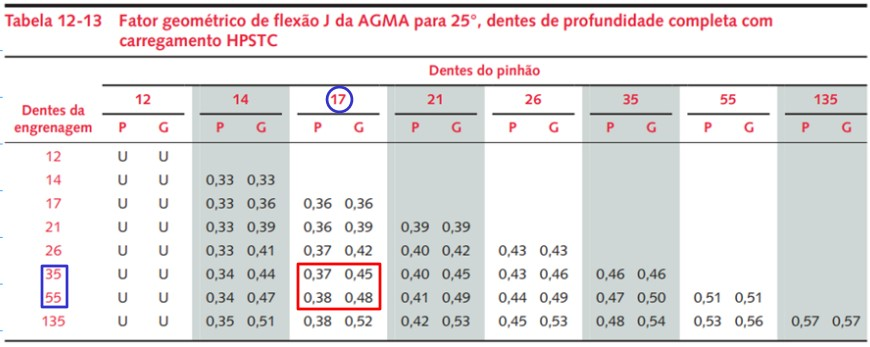

In [29]:
Image('tab1.jpg',width=800)

Para um pinhão possui 17 dentes e a coroa de 51 dentes:

Logo o resumo dos pârametros adotados nessa modelagem, segundo os padrões da literatura são:

| Parâmetro | Valor | Justificativa |
| --- | --- | --- |
| Fator de aplicação ($K_a$)| 1,0 |  Máquina movida e uniforme |
| Fator de tamanho ($K_s$) | 1,0 | Recomendação da norma AGMA |
| Fator de espessura de borda ($K_b$) | 1,0 | Engrenagem de disco sólida |
| Fator de ciclo de carga ($K_I$) | 1,0 | Engrenagem não solta |
| Fator geométrico de resistência de flexão da coroa ($J_{coroa}$) | 0,478 | - |
| Fator geométrico de resistência de flexão da pinhão ($J_{pinhão}$) | 0,38 | - |

In [30]:
print(f'A tensão de flexão no pinhão vale {Eng1.Ten_Flex_Pin():.2f} MPa.')

A tensão de flexão no pinhão vale 29.92 MPa.


De maneira análoga, obtém-se a tensão de flexão da coroa:

$$\sigma_b = \frac{W_t}{FmJ_{coroa}} \frac{K_a K_m K_s K_b K_i}{K_v}$$

In [31]:
print(f'A tensão de flexão na coroa é de {Eng1.Ten_Flex_Cor():.2f} MPa.')

A tensão de flexão na coroa é de 23.79 MPa.


O coeficiente elástico pode ser determinado a partir da seguinte relação:

$$ C_p = \sqrt{\frac{1}{\pi \left[ \left(\frac{1 - \nu_{p}^2}{E_p}\right) + \left(\frac{1 - \nu_{g}^2}{E_g}\right) \right]}} $$

In [32]:
print(f'O coeficiente elástico é {Eng1.Coef_Elastico():.2f}.')

O coeficiente elástico é 187.03.


O fator geométrico é determinado por:

$$I = \frac{\cos(\phi)}{ \left( \frac{1}{\rho_p} + \frac{1}{\rho_i} \right) dp }$$

In [33]:
print(f'O fator geométrico de crateração é {Eng1.Fat_Geo_Crat():.2f}.')

O fator geométrico de crateração é 0.16.


A tensão de superfície para o engrenamento é dada por:

$$ \sigma_{Cp} = Cp \left(\frac{W_t}{FId_i} \frac{K_a K_m K_s K_b K_i}{K_v} \right)^{0.5} $$


In [34]:
sig_1 = Eng1.Tensao_Engrenamento()
print(f'A tensão de superfície é {sig_1:.2f} MPa.')

A tensão de superfície é 382.92 MPa.


## 2º Par de Engrenagens <a id= 'engrenagens2'></a>

In [35]:
Eng2 = Par_de_Engrenagens(6,17,3.5,10,(1800*(1/(3*3.5))),14,(5*np.pi/36),1,1.7,6,1,1,1,0.38,0.483,1,1,0.3,2*10**5)

In [36]:
print(f'Ng = {Eng2.Nc():.0f} dentes.')

Ng = 60 dentes.


In [37]:
print(f'Dp = {Eng2.Dia_Prim_Pinhao()} mm.')

Dp = 102 mm.


In [38]:
print(f'Dg = {Eng2.Dia_Prim_Coroa()} mm.')

Dg = 357.0 mm.


In [39]:
print(f'Tp = {Eng2.Torque_Ent():.2f} N.m.')

Tp = 415.39 N.m.


In [40]:
print(f'W_tangencial = {Eng2.Carga_Tang():.2f} N.')

W_tangencial = 8144.83 N.


In [41]:
print(f'W_radial = {Eng2.Carga_Radial():.2f} N.')

W_radial = 3798.00 N.


In [42]:
print(f'W_total = {Eng2.Carga_Total():.2f} N.')

W_total = 8986.83 N.


In [43]:
print(f'F = {Eng2.Tam_Face()} mm.')

F = 84 mm.


In [44]:
print(f'B = {Eng2.B():.2f}.')

B = 0.83.


In [45]:
print(f'A = {Eng2.A():.2f}.')

A = 59.77.


In [46]:
print(f'V_tangencial = {Eng2.Vel_Tang():.2f} m/s.')

V_tangencial = 0.92 m/s.


In [47]:
print(f'Kv = {Eng2.Fat_Din():.2f}.')

Kv = 0.84.


Para um número de dentes de pinhão igual a 17 e 60 de coroa, tem-se:

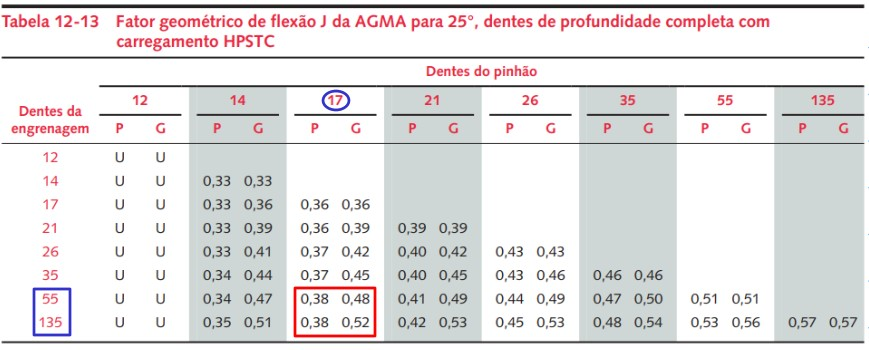

In [48]:
Image('tab2.jpg',width=800)

In [49]:
print(f'σ_b,pinhão = {Eng2.Ten_Flex_Pin():.2f} MPa.')

σ_b,pinhão = 85.56 MPa.


In [50]:
print(f'σ_b,coroa = {Eng2.Ten_Flex_Cor():.2f} MPa.')

σ_b,coroa = 67.32 MPa.


In [51]:
print(f'Cp = {Eng2.Coef_Elastico():.2f}')

Cp = 187.03


In [52]:
print(f'I = {Eng2.Fat_Geo_Crat():.2f}')

I = 0.17


In [53]:
sig_2 = Eng2.Tensao_Engrenamento()
print(f'σ_Cp = {sig_2:.2f} MPa.')

σ_Cp = 633.97 MPa.


## 3º Par de Engrenagens <a id= 'engrenagens3'></a>

In [54]:
Eng3 = Par_de_Engrenagens(9,14,3.75,10,(1800*(1/(3*3.5*3.75))),16,(5*np.pi/36),1,1.7,6,1,1,1,0.34,0.467,1,1,0.3,2*10**5)

In [55]:
print(f'Ng = {Eng3.Nc():.0f} dentes.')

Ng = 52 dentes.


In [56]:
print(f'Dp = {Eng3.Dia_Prim_Pinhao()} mm.')

Dp = 126 mm.


In [57]:
print(f'Dg = {Eng3.Dia_Prim_Coroa()} mm.')

Dg = 472.5 mm.


In [58]:
print(f'Tp = {Eng3.Torque_Ent():.2f} N.m.')

Tp = 1557.70 N.m.


In [59]:
print(f'W_tangencial = {Eng3.Carga_Tang():.2f} N.')

W_tangencial = 24725.38 N.


In [60]:
print(f'W_radial = {Eng3.Carga_Radial():.2f} N.')

W_radial = 11529.64 N.


In [61]:
print(f'W_total = {Eng3.Carga_Total():.2f} N.')

W_total = 27281.44 N.


In [62]:
print(f'F = {Eng3.Tam_Face()} mm.')

F = 144 mm.


In [63]:
print(f'B = {Eng3.B():.2f}.')

B = 0.83.


In [64]:
print(f'A = {Eng3.A():.2f}.')

A = 59.77.


In [65]:
print(f'V_tangencial = {Eng3.Vel_Tang():.2f} m/s')

V_tangencial = 0.30 m/s


In [66]:
print(f'Kv = {Eng3.Fat_Din():.2f}.')

Kv = 0.90.


Para um número de dentes de pinhão igual 14 e da coroa igual a 52, tem-se:

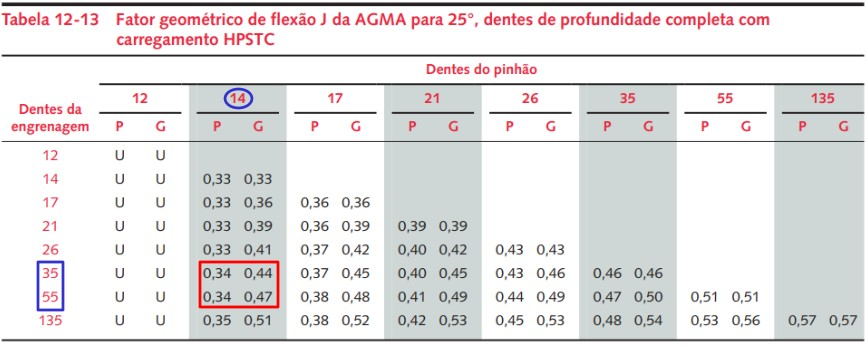

In [67]:
Image('tab3.jpg',width=800)

In [68]:
print(f'σ_b,pinhão = {Eng3.Ten_Flex_Pin():.2f} MPa.')

σ_b,pinhão = 105.51 MPa.


In [69]:
print(f'σ_b,coroa = {Eng3.Ten_Flex_Cor():.2f} MPa.')

σ_b,coroa = 76.82 MPa.


In [70]:
print(f'Cp = {Eng3.Coef_Elastico():.2f}.')

Cp = 187.03.


In [71]:
print(f'I = {Eng3.Fat_Geo_Crat():.2f}.')

I = 0.17.


In [72]:
sig_3 = Eng3.Tensao_Engrenamento()
print(f'σ_Cp = {sig_3:.2f} Mpa.')

σ_Cp = 718.34 Mpa.


## Resistências à fadiga de flexão da AGMA para materiais de engrenagem <a id= 'fs'></a>

In [73]:
class Fator_Seg():
    
    def __init__(self,hb,kt_f,kr_f,horas,dias,anos,turnos):
        self.hb = hb      #armazena o valor da dureza
        self.kt_f = kt_f  #armazena o fator de temperatura
        self.kr_f = kr_f  #armazena o fator de confiabilidade
        self.horas = horas
        self.dias = dias
        self.anos = anos
        self.turnos = turnos
        
    def sfb_linha(self):
        sfb_l = ((6235 + (174*self.hb) - (0.126*(self.hb**2)))*6894.76)/(10**6)
        
        global sfb_lg
        sfb_lg = sfb_l
        
        return sfb_l
    
    def ciclos(self):
        N = 1800*60*self.horas*self.dias*self.anos*self.turnos
        
        global N_g
        N_g = N
        
        return N
    
    def kl(self):
        kl = 1.3558*N_g**(-0.0178)
        
        global klg
        klg = kl
        
        return kl
    
    def sfb(self):
        sfb = sfb_lg*klg/(self.kr_f*self.kt_f)
        
        return sfb
    
    def sfc_linha(self):
        sfc_l = ((27000 + (364*self.hb))*6894.76)/(10**6)
        
        global sfc_lg
        sfc_lg = sfc_l
        
        return sfc_l
    
    def cl(self):
        cl = 1.4488*N_g**(-0.023)
        
        global clg
        clg = cl
        
        return cl
    
    def sfc(self):
        sfc = sfc_lg * clg
        
        return sfc   

###  Resistência à fadiga de flexão

Far-se-á a consideração de um aço AGMA grau 2 endurecido inteiramente com uma dureza de 300 HB. Que irá funcionar 12 horas por dia, durante 280 dias por ano, durante dois anos e por dois turnos.

In [74]:
Fad = Fator_Seg(300,1,1,12,280,2,2)

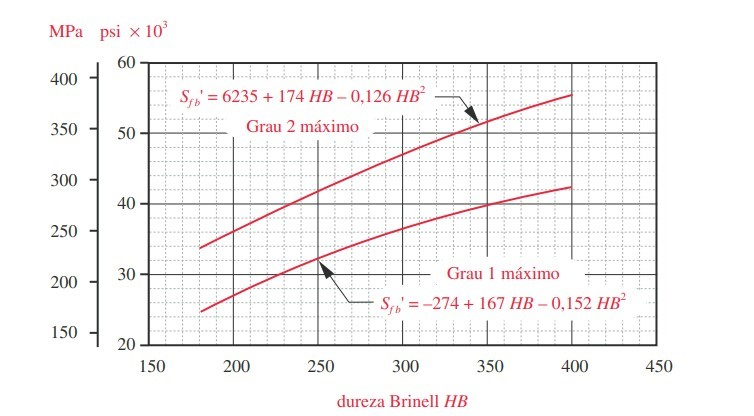

In [75]:
Image('graf1.jpg',width=700)

Como apontado pelo gráfico, a equação da resistência à fadiga de flexão publicados pela AGMA para aços de grau 2 é:

$$S_{fb}' = 6235 + 174 HB - 0,126HB^{2}$$

In [76]:
print(f'A restência à fadiga é S_fb´ = {Fad.sfb_linha():.2f} MPa.')

A restência à fadiga é S_fb´ = 324.71 MPa.


A próxima etapa consiste em determinar o fator $K_l$, que pode encontrado a partir do número requerido de ciclos na vida das engrenagens. O pinhão está sujeito ao número maior de repetições de carregamento de dente, portanto, calculamos o fator de vida baseado nele, por meio da seguinte fórmula:

$$N = 1800 RPM \times \left (\frac{60 min}{h} \right) \times dias \times anos \times turnos $$

In [77]:
print(f'O número de ciclos é {Fad.ciclos():.2e}.')

O número de ciclos é 1.45e+09.


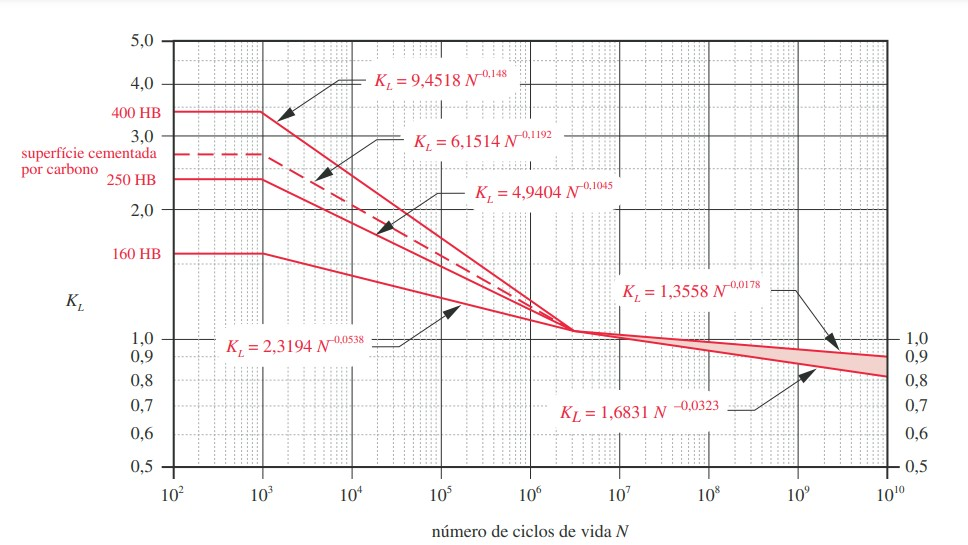

In [78]:
Image('graf3.jpg',width=700)

A partir do número de ciclos, percebe-se que a equação a ser utilizada para determinar o fator de vida é:

$$K_l = 1.3558 N ^{-0,0178}$$

In [79]:
print(f'Kl = {Fad.kl():.2f}')

Kl = 0.93


Para calcular o valor da resistência à fadiga de flexão corrigida usa-se a fórmula:

$$S_{fb} = \frac{K_l}{K_t K_r} S_{fb}'$$

Os valores de $K_l$ e $S_{fb}'$ já foram descobertos. O fator de temperatura, $K_t$, é igual a 1, tendo em vista que  esse valor pode ser adotado para os aços em óleos com temperaturas até cerca de 120ºC, assim como o fator de confiabilidade, $K_r$, que também vale 1, pois considerou-se que os dados sobre o material da engrenagem são todos tomados a um nível de confiabilidade de 99%.

In [80]:
print(f'S_fb = {Fad.sfb():.2f} MPa.')

S_fb = 302.42 MPa.


### Resistência à fadiga de superfície

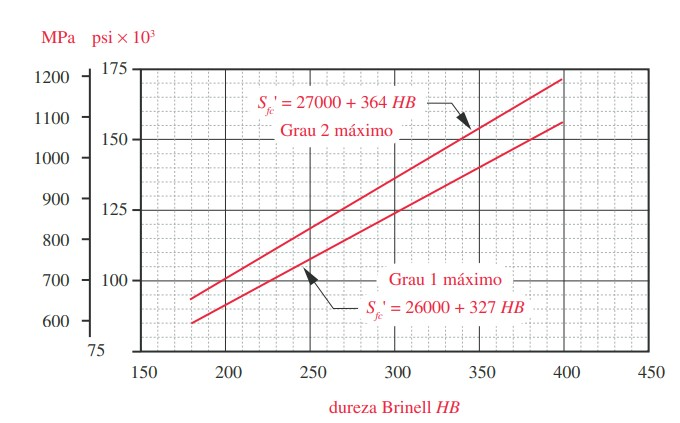

In [81]:
Image('graf4.jpg',width=700)

Um valor estimado da resistência à fadiga de superfície pode ser obtido através do gráfico acima, e como adotou-se grau 2, a fórmula é:

$$S_{fc}' = 27000 + 364 HB$$

In [82]:
print(f'S_fc´ = {Fad.sfc_linha():.2f} MPa.')

S_fc´ = 939.07 MPa.


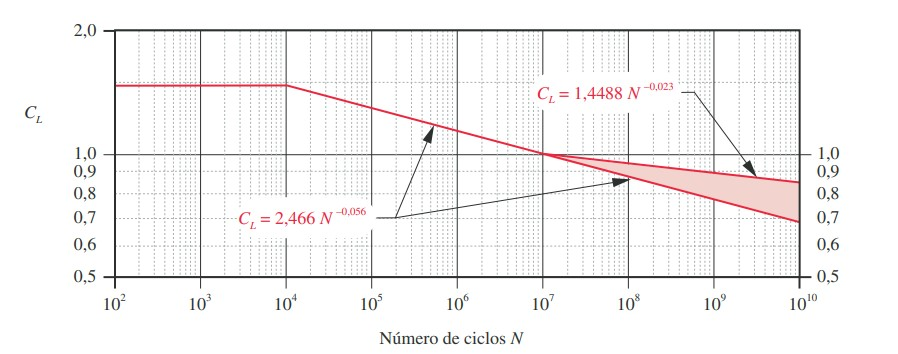

In [83]:
Image('graf2.jpg',width=700)

Para o número de ciclos deste eengrenamento, fator de vida de superfície, Cl, é descrito pela equação:

$$C_l =  1,4488 N ^{-0,023}$$

In [84]:
print(f'Cl = {Fad.cl():.2f}.')

Cl = 0.89.


O fator de resistência à fadiga de superfície é dado por:

$$S_{fc} = \frac{C_l C_h}{C_t C_r} S_{fc}'$$

onde:

$C_l = 0,89$ <br>
$C_t = K_t = 1$<br>
$C_r = K_r = 1$<br>
$C_h = 1$, pois todas as engrenagens são de materiais com a mesma dureza

In [85]:
print(f'S_fc = {Fad.sfc():.2f} MPa.')

S_fc = 837.50 MPa.


## Coeficiente de segurança contra flexão <a id= 'coef'></a>

O coeficiente de segurança contra a falha de flexão é encontrado a partir da razão entre a resistência de flexão corrigida com a tensão de flexão para cada engrenagem no engrenamento:

$$N_b = \frac{S_{fb}}{\sigma_{b}}$$

* Para o primeiro par de engrenagens temos:

In [86]:
N_p1 = Fad.sfb()/Eng1.Ten_Flex_Pin()
N_p1 = round(N_p1,2)
print(f'N_b,pinhão = {N_p1}')

N_b,pinhão = 1.89


In [87]:
N_c1 = Fad.sfb()/Eng1.Ten_Flex_Cor()
N_c1 = round(N_c1,2)
print(f'N_b,coroa = {N_c1}')

N_b,coroa = 2.38


* Para o segundo par de engrenagens:

In [88]:
N_p2 = Fad.sfb()/Eng2.Ten_Flex_Pin()
N_p2 = round(N_p2,2)
print(f'N_b,pinhão = {N_p2}')

N_b,pinhão = 2.14


In [89]:
N_c2 = Fad.sfb()/Eng2.Ten_Flex_Cor()
N_c2 = round(N_c2,2)
print(f'N_b,coroa = {N_c2}')

N_b,coroa = 2.71


* Para o terceiro par de engrenagens:

In [90]:
N_p3 = Fad.sfb()/Eng3.Ten_Flex_Pin()
N_p3 = round(N_p2,3)
print(f'N_b,pinhão = {N_p3}')

N_b,pinhão = 2.14


In [91]:
N_c3 = Fad.sfb()/Eng3.Ten_Flex_Cor()
N_c3 = round(N_c3,2)
print(f'N_b,coroa = {N_c3}')

N_b,coroa = 3.94


## Coeficiente de segurança contra a falha de superfície <a id= 'coef1'></a>

O coeficiente de segurança contra falha se superfície pode ser encontrado comparando a carga real à carga que produziria uma tensão igual à resistência de flexão corrigida do material.

$$N_c = \left(\frac{S_{fc}}{\sigma_{c}}\right)^2$$

* Para o primeiro par:

In [92]:
print(f'N_c1 = {(Fad.sfc()/sig_1)**2:.2f}.')

N_c1 = 4.78.


* Para o segundo par:

In [93]:
print(f'N_c2 = {(Fad.sfc()/sig_2)**2:.2f}.')

N_c2 = 1.75.


* Para o terceiro par:

In [94]:
print(f'N_c3 = {(Fad.sfc()/sig_3)**2:.2f}.')

N_c3 = 1.36.


## Referências Bibliográficas <a id= 'referencia-bibliografica'></a>

NORTON, Robert. Projeto de máquinas: Uma abordagem prática. In: EMBREAGENS e Freios. 4. ed. [S. l.: s. n.], 2011.<br>